# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [2]:
df_quantitative = df.select_dtypes(include=['float64', 'int64'])

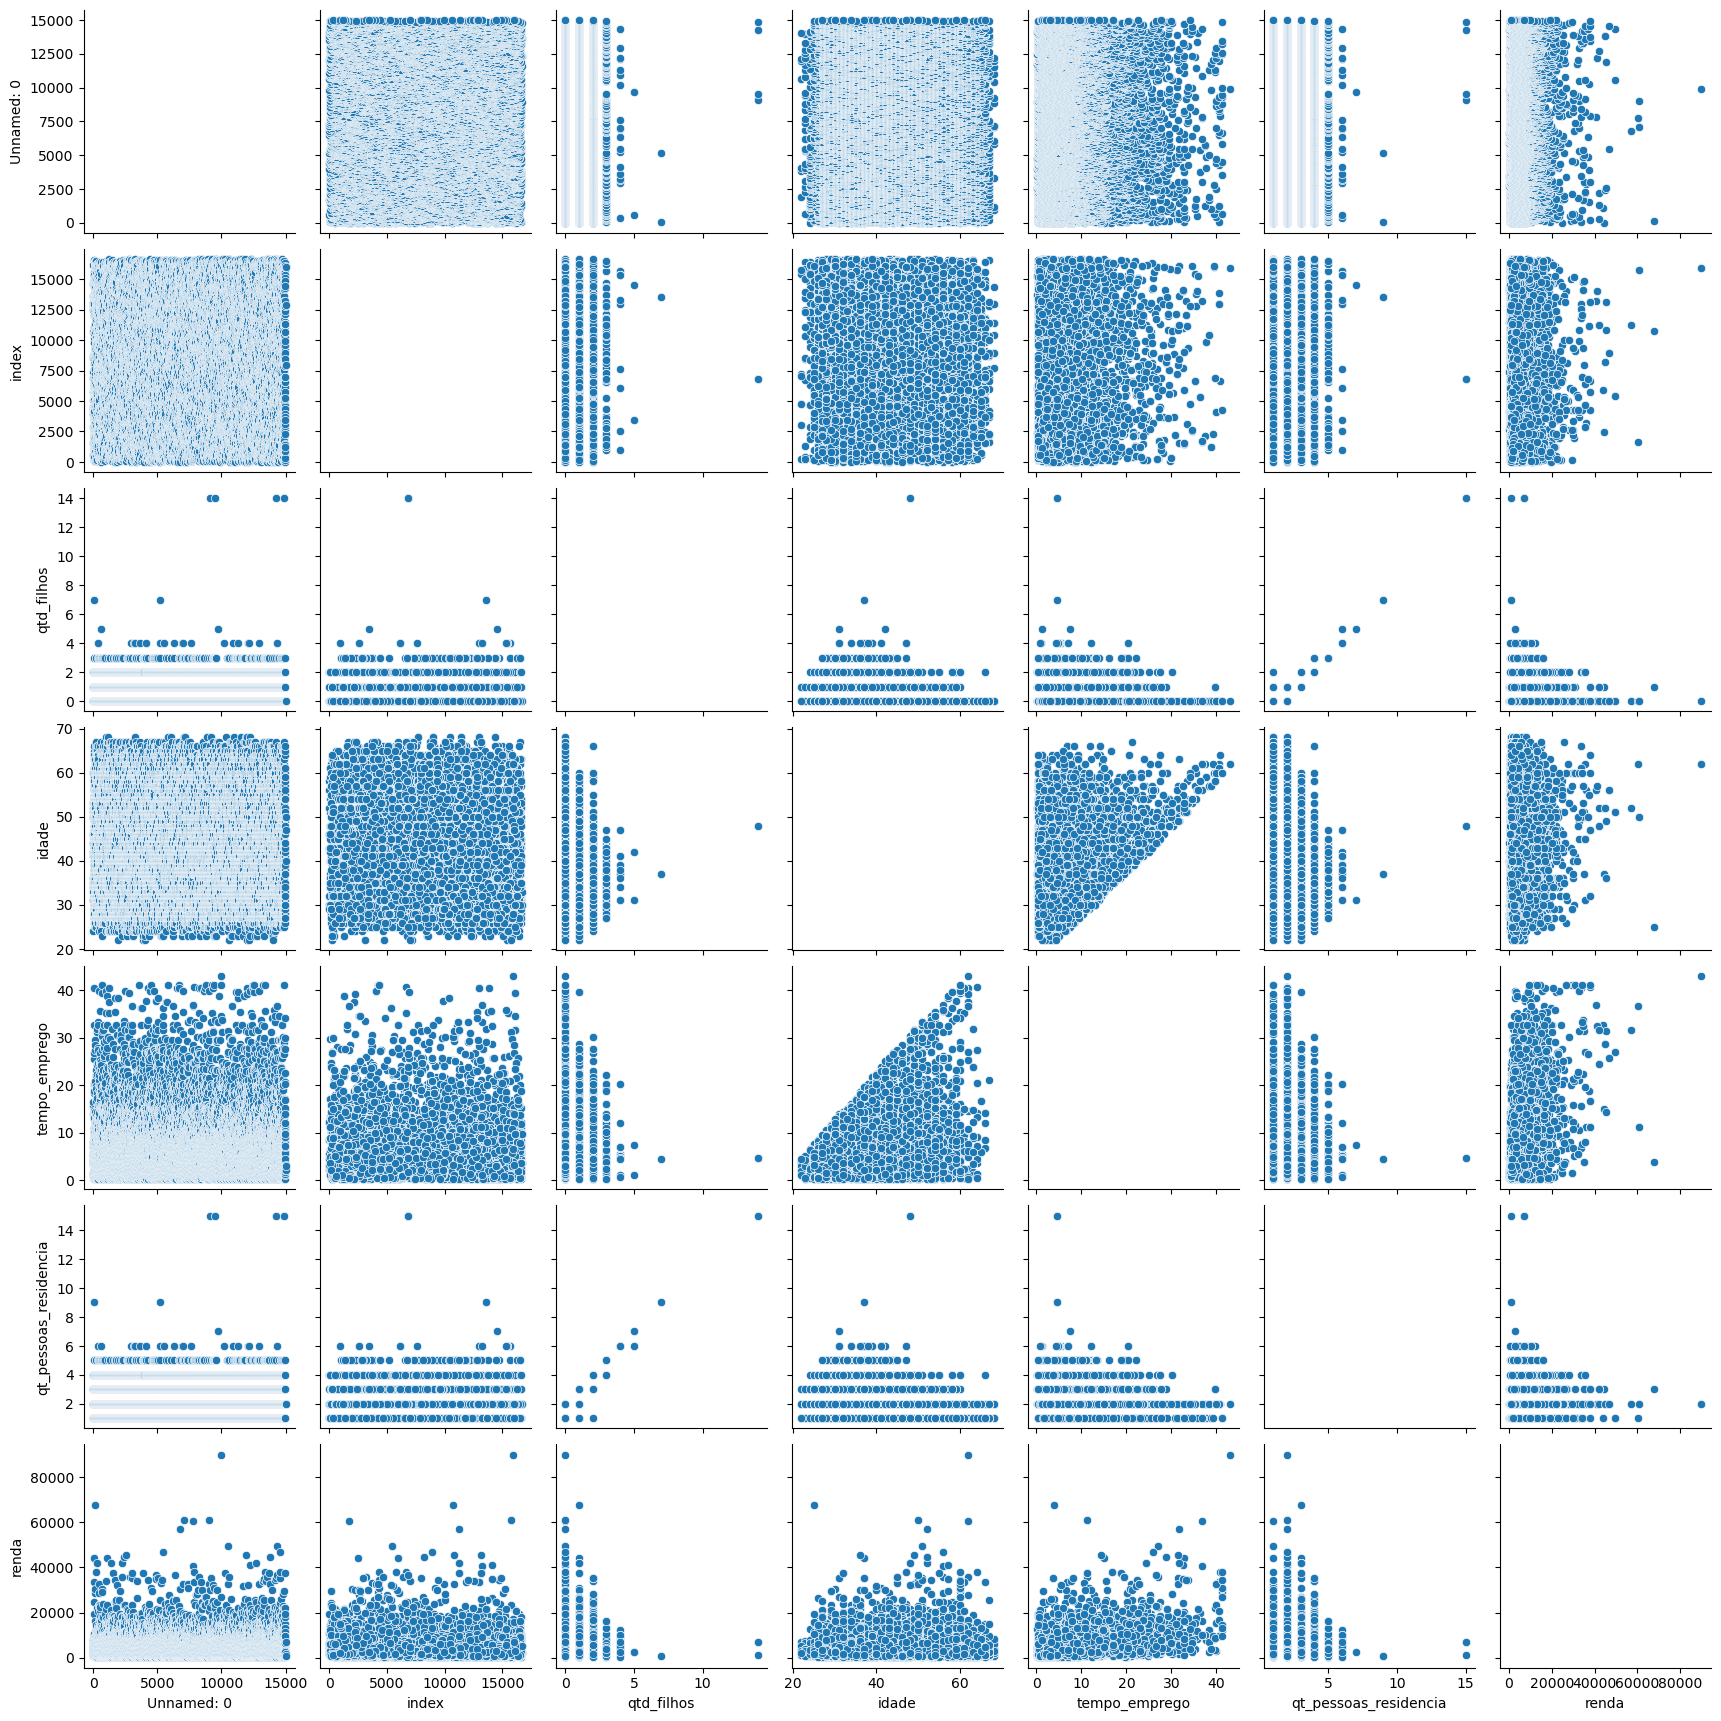

In [3]:
sns.pairplot(data=df_quantitative,diag_kind='scatter');plt.show()

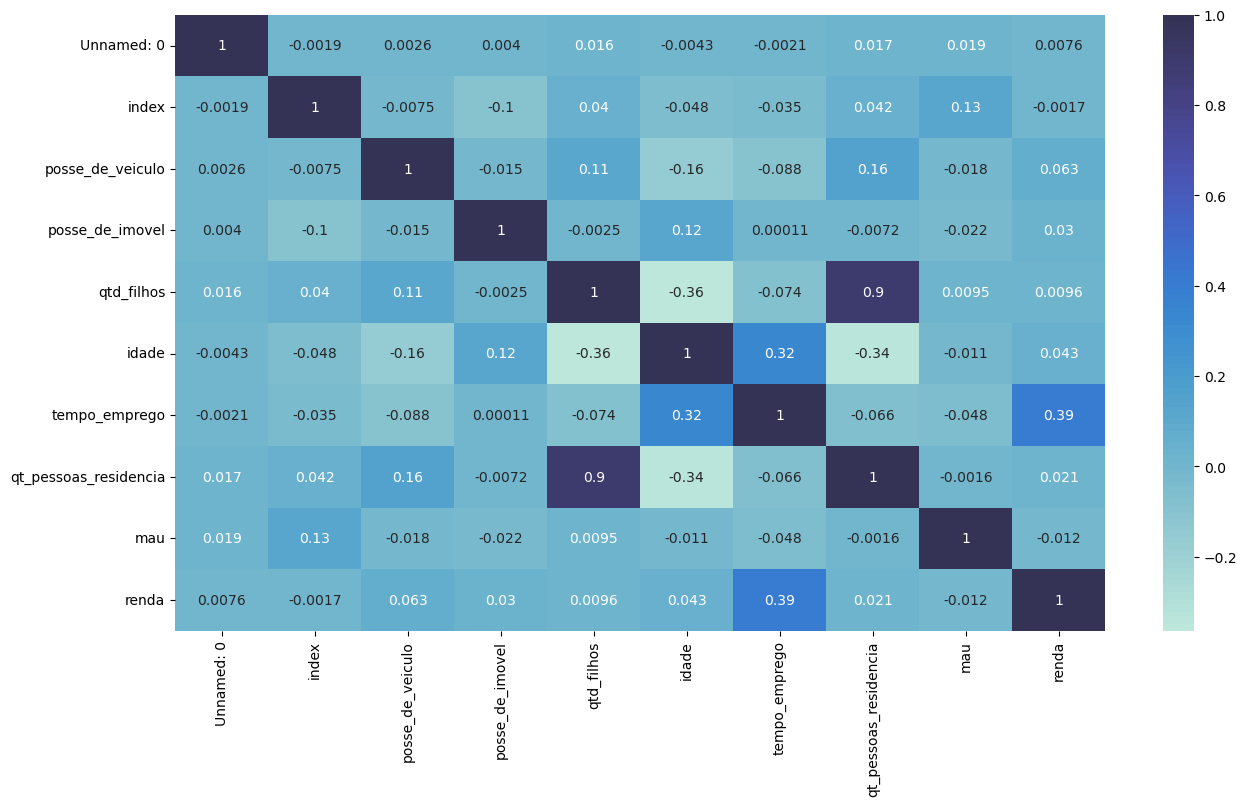

In [4]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr(),annot=True,center=1.4);plt.show()

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

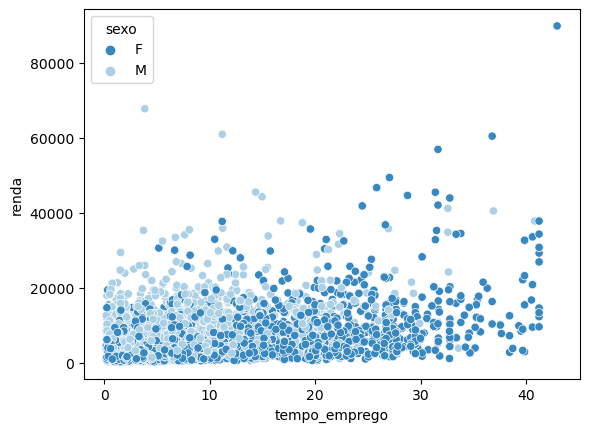

In [5]:
sns.scatterplot(data=df,x='tempo_emprego',y='renda',palette='Blues_r',hue='sexo')
plt.show()

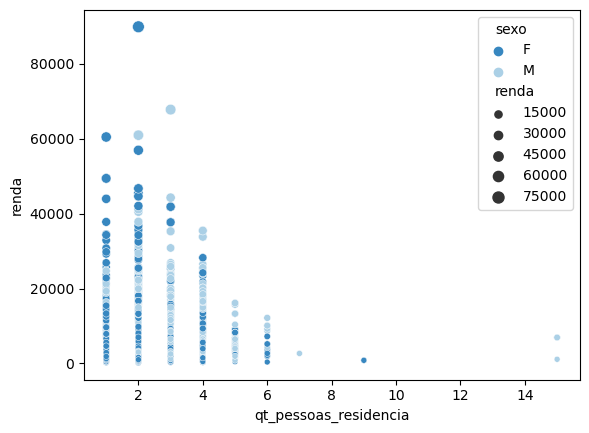

In [21]:
sns.scatterplot(data=df,x='qt_pessoas_residencia',y='renda',palette='Blues_r',size='renda',hue='sexo')
plt.show()


3) Na su aopinião, há outliers na variável renda?

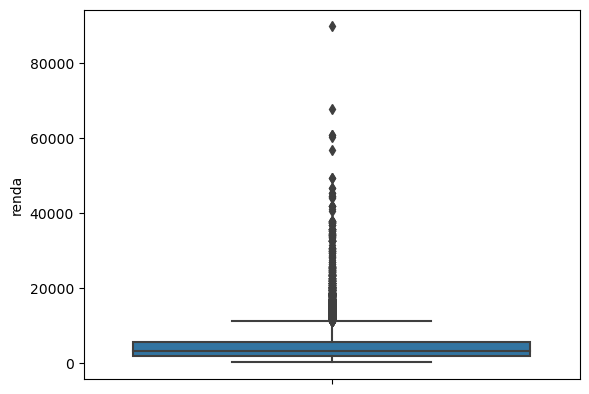

In [7]:
sns.boxplot(data=df,y='renda')
plt.show()

Bom, quando falamos de financeiro, sempre há possibilidade de outliers, quase sempre , porque quando se trata de dinheiro, ele pode alterar os calculos estatísticos completamente. Exemplo, tenho 5 pessoas, que ganham respectivamente:
- 5000
- 6000
- 5200
- 3400
- 37000

em média: 11320.0\
desvio padrão: 14386.52

perceba que o fato de alguem ganhar um valor absurdo comparado a outros, altera completamente os dados para análise.


In [8]:
df['renda'].describe()

count    15000.000000
mean      4624.632946
std       4628.571729
min        159.900000
25%       1945.740000
50%       3278.260000
75%       5642.365000
max      89918.040000
Name: renda, dtype: float64

In [9]:
Q1 = df['renda'].quantile(0.25)
print(Q1)
Q3 = df['renda'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1 #INTERVALO INTERQUARTIL
print(IQR);print()
outliers = df[(df['renda'] < (Q1 - 1.5 * IQR)) | (df['renda'] > (Q3 + 1.5 * IQR))]
outliers.renda.min()

1945.74
5642.365
3696.625



11190.5

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [10]:
df['log_renda'] = np.log(df['renda'])

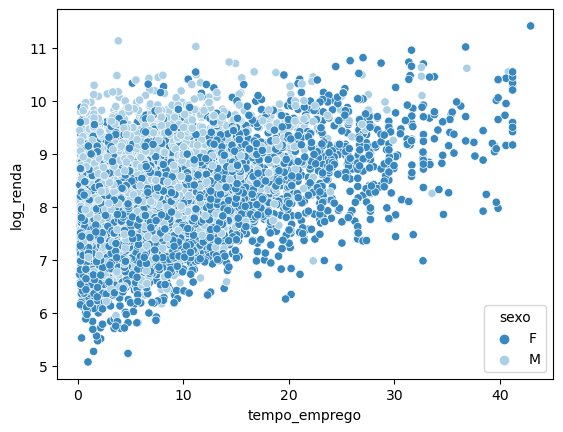

In [11]:
sns.scatterplot(data=df,x='tempo_emprego',y='log_renda',palette='Blues_r',hue='sexo')
plt.show()

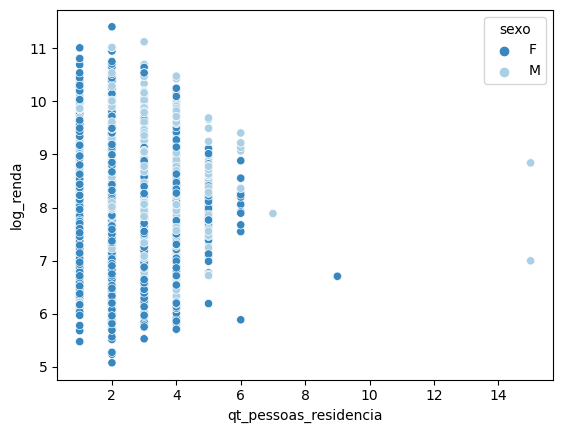

In [14]:
sns.scatterplot(data=df,x='qt_pessoas_residencia',y='log_renda',palette='Blues_r',hue='sexo')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

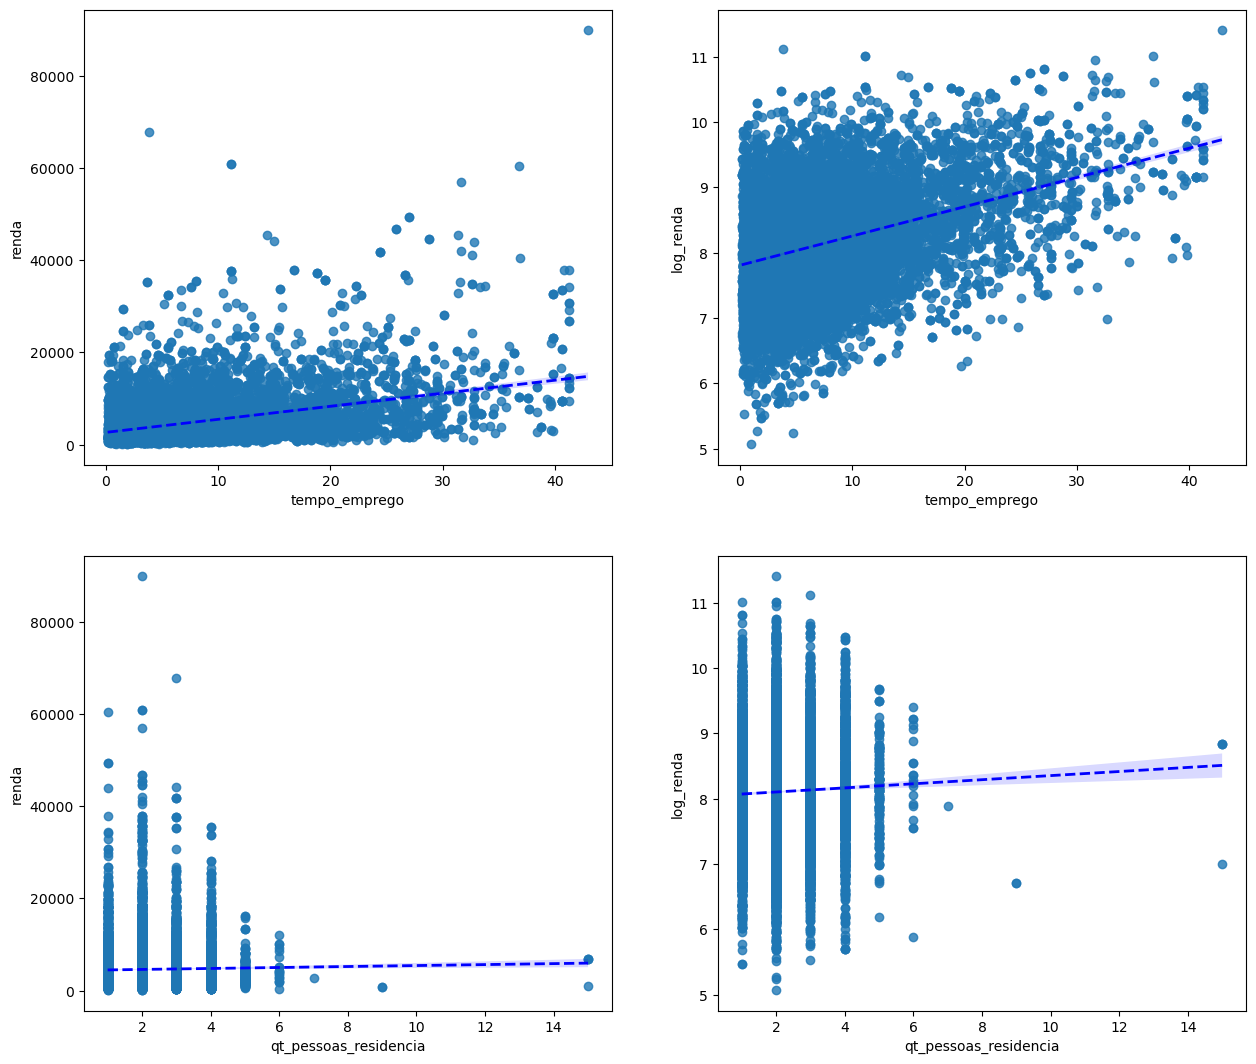

In [35]:
#vou plota-los lado a lado inicialmente
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(15,13))

sns.regplot(data=df,x='tempo_emprego',y='renda',ax=ax[0][0], line_kws={'color': 'blue', 'lw': 2, 'linestyle': '--'})
sns.regplot(data=df,x='tempo_emprego',y='log_renda',ax=ax[0][1],line_kws={'color': 'blue', 'lw': 2, 'linestyle': '--'})
sns.regplot(data=df,x='qt_pessoas_residencia',y='renda',ax=ax[1][0],line_kws={'color': 'blue', 'lw': 2, 'linestyle': '--'})
sns.regplot(data=df,x='qt_pessoas_residencia',y='log_renda',ax=ax[1][1],line_kws={'color': 'blue', 'lw': 2, 'linestyle': '--'})

plt.show()

Só para ter mais uma confirmação vamos plotar o bloxplot

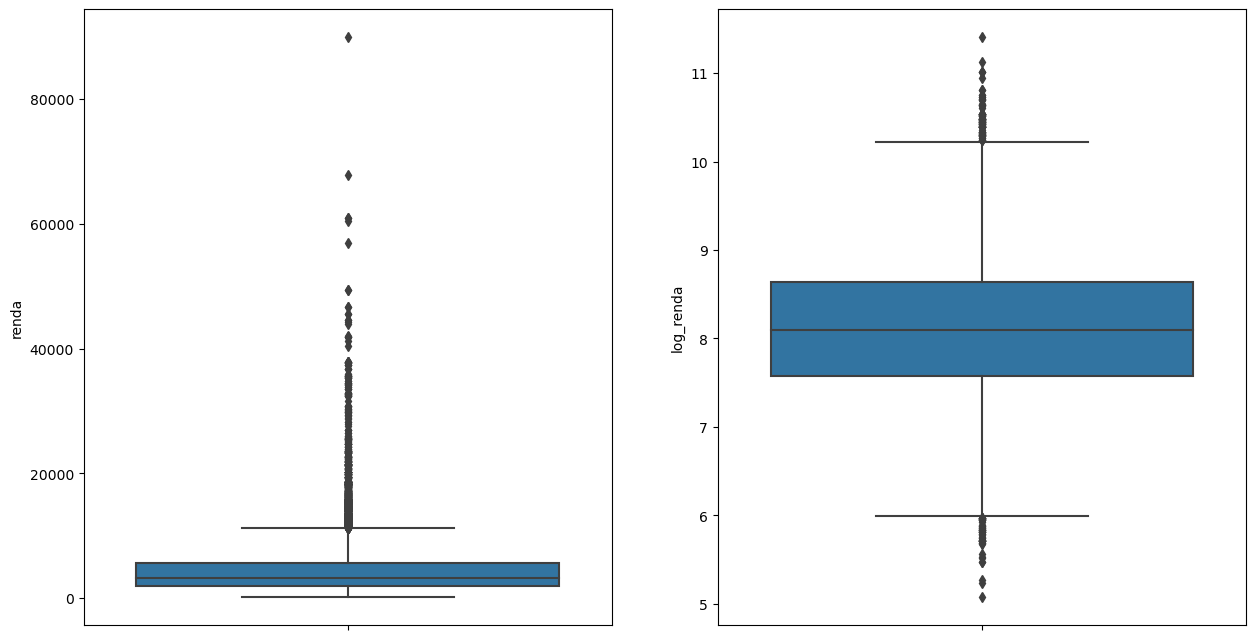

In [37]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,8))

sns.boxplot(data=df,y='renda',ax=ax[0])
sns.boxplot(data=df,y='log_renda',ax=ax[1])

plt.show()

In [40]:
Q1 = df['renda'].quantile(0.25)
Q3 = df['renda'].quantile(0.75)
IQR = Q3 - Q1 
outliers = df[(df['renda'] < (Q1 - 1.5 * IQR)) | (df['renda'] > (Q3 + 1.5 * IQR))]
outliers

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,log_renda
22,22,2015-01-01,2450,M,False,True,1,Assalariado,Superior completo,Casado,Casa,37,14.958904,3.0,False,44277.19,10.698225
23,23,2015-01-01,14475,M,False,True,0,Empresário,Superior completo,Casado,Casa,55,1.520548,2.0,True,24664.37,10.113115
62,62,2015-01-01,12574,F,False,False,0,Assalariado,Secundário,Casado,Casa,51,25.547945,2.0,False,19324.31,9.869119
82,82,2015-01-01,12961,F,False,True,0,Assalariado,Secundário,Casado,Casa,61,40.575342,2.0,False,33568.12,10.421332
113,113,2015-01-01,10746,M,True,False,1,Empresário,Secundário,Casado,Casa,25,3.849315,3.0,False,67794.54,11.124237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14960,14960,2016-03-01,5138,M,False,True,1,Assalariado,Primário,Casado,Casa,28,4.635616,3.0,True,11587.15,9.357652
14961,14961,2016-03-01,12733,M,True,True,1,Empresário,Superior completo,Casado,Casa,27,4.863014,3.0,False,17842.17,9.789320
14965,14965,2016-03-01,7863,M,True,True,0,Empresário,Secundário,Casado,Casa,44,22.482192,2.0,False,19929.60,9.899961
14974,14974,2016-03-01,12413,M,True,True,0,Empresário,Superior completo,Casado,Casa,50,5.865753,2.0,False,22223.14,10.008889


In [41]:
Q1 = df['log_renda'].quantile(0.25)
Q3 = df['log_renda'].quantile(0.75)
IQR = Q3 - Q1
outlies = df[(df['log_renda'] < (Q1- 1.5*IQR)) | (df['log_renda'] > (1.5*IQR + Q3))]
outliers

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda,log_renda
22,22,2015-01-01,2450,M,False,True,1,Assalariado,Superior completo,Casado,Casa,37,14.958904,3.0,False,44277.19,10.698225
23,23,2015-01-01,14475,M,False,True,0,Empresário,Superior completo,Casado,Casa,55,1.520548,2.0,True,24664.37,10.113115
62,62,2015-01-01,12574,F,False,False,0,Assalariado,Secundário,Casado,Casa,51,25.547945,2.0,False,19324.31,9.869119
82,82,2015-01-01,12961,F,False,True,0,Assalariado,Secundário,Casado,Casa,61,40.575342,2.0,False,33568.12,10.421332
113,113,2015-01-01,10746,M,True,False,1,Empresário,Secundário,Casado,Casa,25,3.849315,3.0,False,67794.54,11.124237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14960,14960,2016-03-01,5138,M,False,True,1,Assalariado,Primário,Casado,Casa,28,4.635616,3.0,True,11587.15,9.357652
14961,14961,2016-03-01,12733,M,True,True,1,Empresário,Superior completo,Casado,Casa,27,4.863014,3.0,False,17842.17,9.789320
14965,14965,2016-03-01,7863,M,True,True,0,Empresário,Secundário,Casado,Casa,44,22.482192,2.0,False,19929.60,9.899961
14974,14974,2016-03-01,12413,M,True,True,0,Empresário,Superior completo,Casado,Casa,50,5.865753,2.0,False,22223.14,10.008889


Ou seja, não mudou muito na minha opinião.